### Data Analytics Online Career Accelerator
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: Creating a decision tree

**This is the solution to the activity.**

You’ve learned how to build classification and regression decision trees and how to test the accuracy of their predictions. Now it’s time to apply your learning in a practical activity. You will use the same data sets to assist Shen Lee in building a decision tree and compare the output to the binary logistic regression (BLR) and support vector machine (SVM) models you built with her previously.

Shen Lee, a senior manager at Westside Hospital, wants to understand if breast cancer can be predicted based on some kind of detection measurement. As part of her classification predictive analysis, Shen has already built BLR and SVM models, but she needs more models to compare in order to be confident about the accuracy of the predictions she hopes to generate. 

Now, Shen uses a decision tree, specifically a classification decision tree (due to the nature of her aim of predicting positive breast cancer cases from the available data), which can then be compared to the BLR and SVM model. 
Can you help Shen to build a decision tree and compare the results with the BLR and SVM models? 

## 1. Prepare your workstation

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

# Read the data file with Pandas.
df = pd.read_csv('../Data/breast_cancer_data.csv', 
                 index_col='id') 

# Sense-check the data.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Explore and prepare the data set

In [2]:
# Determine the number of null values.
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [3]:
# All values for 'Unnamed: 32' are null. Drop the column or feature.
df.drop(labels='Unnamed: 32', axis=1, inplace=True)

# View DataFrame.
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Determine the descriptive statistics.
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Determine if data set is balanced.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### Observation
- The data is not balanced, but we have relatively large and likely representative datasets.
- We can continue for now, but can consider evaluating the impact of balancing the classes in model tuning phase.

CART is forgiving of unbalanced data. As long as we have a good representation of the problem, we don't need to perform much data preparation. 
- We follow two phases:
    - Building or growing the tree
    - Address overfitting (Pre- and post-pruning, explore different model evaluation criteria)
- Model tuning can include various elements such as:
    - hyperparameter tuning and model selection
    - data transformation

> **Note: ** In this example, we are exploring a brief introduction to pruning, and balancing classes is not required at this stage.

> **Note: ** We are not touching on feature importance at this stage, but it is worth noting that we can both reduce input features and identify important features from output of the model


## 3. Prepare the data for creating a decision tree
Note that classification and regression trees (CART) do not require any special data preparation other than a good representation of the problem.

In [6]:
# Import all the necessary packages:


# Set the variables: Use the diagnosis as the target variable and the remainder as input variables
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

## 4. Fit the tree and evaluate options

In [7]:
# Create testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

# Create classifier
clf=DecisionTreeClassifier(random_state=0)

# Fit the training data
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
# Predict using the training data
y_train_predicted=clf.predict(X_train)

# Predict using the test data
y_test_predicted=clf.predict(X_test)

# Print accuracy values
print(accuracy_score(y_train,y_train_predicted)) # prediction is the same as the observation
print(accuracy_score(y_test,y_test_predicted)) # prediction on 'unseen data'

1.0
0.9122807017543859


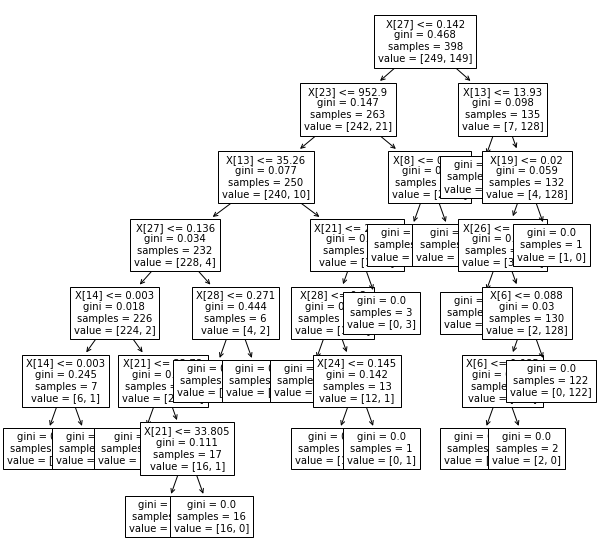

In [9]:
# Plot the tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10)

# Print the plot with plt.show().
plt.show() 

In [10]:
# Pruning the model using (pre-)pruning using supplied parameters
# In practice we would use a specific method such as cost complexity pruning to evaluate alternatives.
clfp = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 5,
                             min_samples_leaf = 5,
                             min_samples_split = 5)
clfp.fit(X_train,y_train)
y_predicted=clfp.predict(X_test)
accuracy_score(y_test,y_predicted)

0.9415204678362573

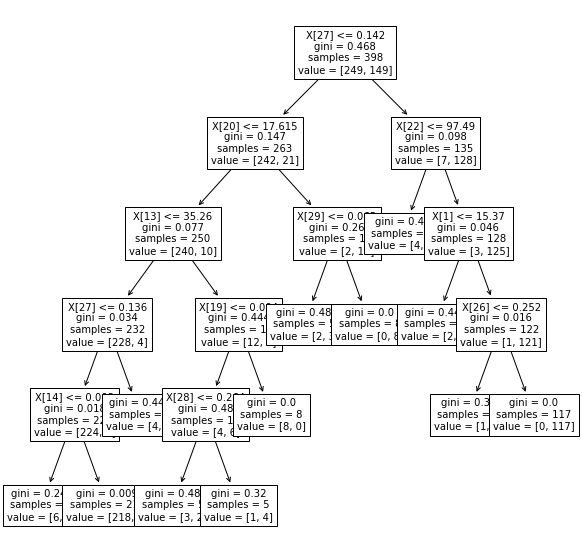

In [11]:
# Plot the pruned tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clfp, fontsize=10)

# Print the plot with plt.show().
plt.show() 

## 5. Evaluate the goodness of fit

In [13]:
# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion = pd.DataFrame(confusion_matrix, index=['is_healthy', 'is_cancer'],
                         columns=['predicted_healthy', 'predicted_cancer'])

# View the output.
confusion

,predicted_healthy,predicted_cancer
is_healthy,101,7
is_cancer,3,60


<AxesSubplot:>

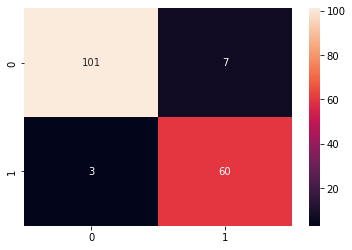

In [14]:
# Plot the confusion_matrix. #NOTE: Color scheme misleading as we are not plotting %'s
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [16]:
# Print the accuracy and classification report.
print(metrics.accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

0.9415204678362573
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



## 6. Fit the final model


In [17]:

# Note that we now use all the available data for our final model.

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

# Create a Decision Tree classifer object.
clff = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 5,
                             min_samples_leaf = 5,
                             min_samples_split = 5)

# Train the Decision Tree Classifer.
clff = clff.fit(X, y)

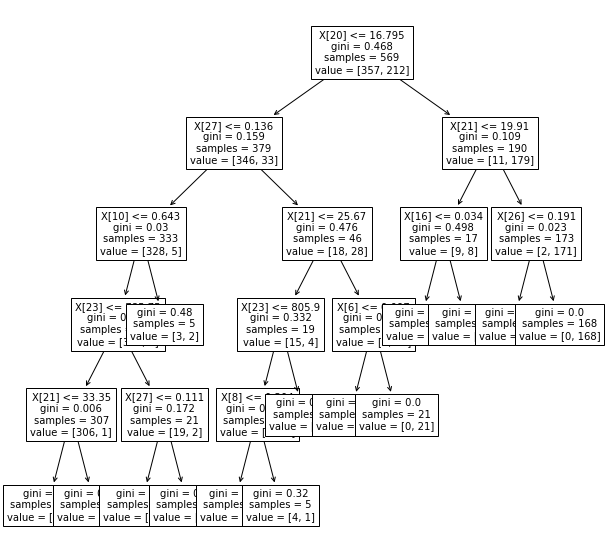

In [18]:
# Plot final model

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clff, fontsize=10)

# Print the plot with plt.show().
plt.show() 

## 7. For interest only
We can take a quick look at the impact of normalising the data and balancing the classes. In general, CART-algorithms do not require additional data transformation, but in some cases we can affect the performance of the models by tuning algorithms, or transforming data.

In [19]:
# For interest only: Evaluate the impact of normalising the data
# Normalise the data with the min-max feature scale.
Xn = (X -np.min(X))/(np.max(X)-np.min(X)).values

In [20]:
# Normalising the data decreases the accuracy slightly
X_train,X_test,y_train,y_test=train_test_split(Xn,y,random_state=0,test_size=0.3)
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
clf = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 5,
                             min_samples_leaf = 5,
                             min_samples_split = 5)
clf.fit(X_train,y_train)
y_predicted=clf.predict(X_test)
accuracy_score(y_test,y_predicted)

0.9590643274853801

In [21]:
# For interest only: Evaluate the impact of balancing the classes
import imblearn
from imblearn.over_sampling import SMOTE 

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)
# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['diagnosis'])

# View DataFrame.
#print(os_data_X.head())
#os_data_y.head()

clf=DecisionTreeClassifier(random_state=0)
clf.fit(os_data_X,os_data_y)
clf = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 5,
                             min_samples_leaf = 5,
                             min_samples_split = 5)
clf.fit(os_data_X,os_data_y)
y_predicted=clf.predict(X_test)
accuracy_score(y_test,y_predicted)

0.8947368421052632